In [ ]:
!pip install datasets
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

# Hugging Face Dataset'i Yükleme
dataset_name = "OsBaran/tryTr5"  # Dataset adını uygun şekilde değiştir
dataset = load_dataset(dataset_name)

# Veriyi DataFrame'e Çevirme
df = pd.DataFrame(dataset['train'])
# None veya NaN değerleri kontrol etme
print("Eksik veri sayısı:\n", df.isnull().sum())

# None/NaN satırlarını kaldırma
df = df.dropna(subset=['text', 'label'])

# Temizleme sonrası veri kontrolü
print("Temizleme sonrası boyut:", df.shape)

# Etiketlerin Dağılımını Kontrol Etme
print(df['label'].value_counts())

# Eğitim ve Test Bölme (%70 eğitim, %30 test)
balanced_train_data = Dataset.from_pandas(df)
dataset_name = "OsBaran/tryTr4"  # Dataset adını uygun şekilde değiştir

dataset = load_dataset(dataset_name)

# Veriyi DataFrame'e Çevirme
df = pd.DataFrame(dataset['train'])
# None veya NaN değerleri kontrol etme
print("Eksik veri sayısı:\n", df.isnull().sum())

# None/NaN satırlarını kaldırma
df = df.dropna(subset=['text', 'label'])

# Temizleme sonrası veri kontrolü
print("Temizleme sonrası boyut:", df.shape)

# Etiketlerin Dağılımını Kontrol Etme
print(df['label'].value_counts())

# Eğitim ve Test Bölme (%70 eğitim, %30 test)
test_data = Dataset.from_pandas(df)
# test_data = load_dataset("OsBaran/tryTr5")["train"]
# train_data, test_data = train_test_split(df, test_size=0, stratify=df['label'], random_state=42)

# Etiket Dağılımını Eğitim ve Test Seti İçin Kontrol Etme
# print("Eğitim Seti Dağılımı:\n", train_data['label'].value_counts(normalize=True))
# print("Test Seti Dağılımı:\n", test_data['label'].value_counts(normalize=True))

# Veri Dengesi (SMOTE veya Alt Örnekleme İle İsteğe Bağlı)
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# balanced_train_data, balanced_train_labels = ros.fit_resample(
#     train_data[['text']], train_data['label']
# )

# # Dengeli Eğitim Setini DataFrame'e Çevir
# balanced_train_data = pd.DataFrame(balanced_train_data, columns=["text"])
# balanced_train_data["label"] = balanced_train_labels

# print("Dengeli Eğitim Seti Dağılımı:\n", balanced_train_data['label'].value_counts())
test_data

Eksik veri sayısı:
 text     44
label     0
dtype: int64
Temizleme sonrası boyut: (23343, 2)
label
0    15106
1     8237
Name: count, dtype: int64
Eksik veri sayısı:
 text                 0
label                0
__index_level_0__    0
dtype: int64
Temizleme sonrası boyut: (3000, 3)
label
0    1500
1    1500
Name: count, dtype: int64


Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 3000
})

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1500
           1       0.93      0.77      0.84      1500

    accuracy                           0.86      3000
   macro avg       0.87      0.86      0.86      3000
weighted avg       0.87      0.86      0.86      3000



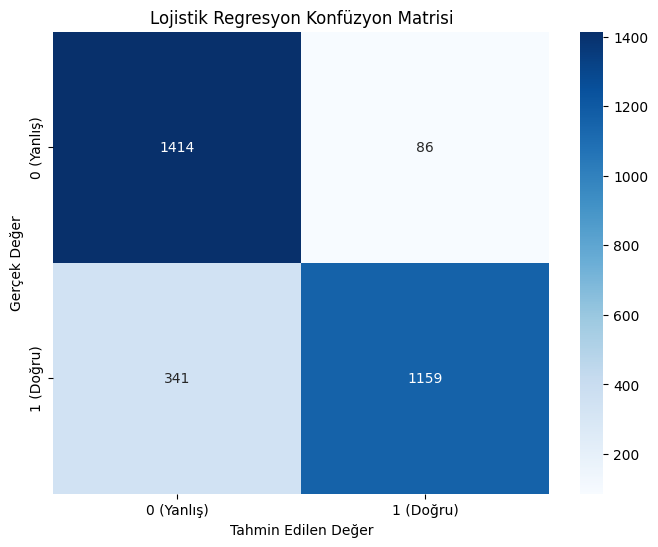


Metrics:
Kesinlik (Precision): 0.93
Duyarlılık (Recall): 0.77
F1 Skoru: 0.84
Doğruluk (Accuracy): 0.86


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# TF-IDF Vektörizasyonu
vectorizer = TfidfVectorizer(max_features=5000)  # İsteğe göre özellik sayısını artırabilirsin
X_train = vectorizer.fit_transform(balanced_train_data['text'])
X_test = vectorizer.transform(test_data['text'])

y_train = balanced_train_data['label']
y_test = test_data['label']
# Logistic Regression Modeli
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)
# Test Seti Tahminleri
y_pred = logreg_model.predict(X_test)

# Performans Metrikleri
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Yanlış)", "1 (Doğru)"], yticklabels=["0 (Yanlış)", "1 (Doğru)"])
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Gerçek Değer")
plt.title("Lojistik Regresyon Konfüzyon Matrisi")
plt.show()
kesinlik = precision_score(y_test, y_pred, average='binary')  # İkili sınıflandırma için
duyarlilik = recall_score(y_test, y_pred, average='binary')
f1_skoru = f1_score(y_test, y_pred, average='binary')
dogruluk = accuracy_score(y_test, y_pred)

print("\nMetrics:")
print(f"Kesinlik (Precision): {kesinlik:.2f}")
print(f"Duyarlılık (Recall): {duyarlilik:.2f}")
print(f"F1 Skoru: {f1_skoru:.2f}")
print(f"Doğruluk (Accuracy): {dogruluk:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1500
           1       0.93      0.77      0.84      1500

    accuracy                           0.86      3000
   macro avg       0.87      0.86      0.86      3000
weighted avg       0.87      0.86      0.86      3000



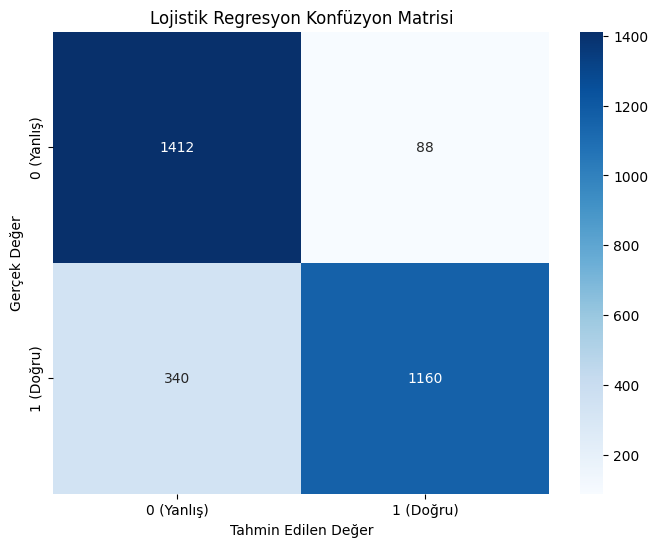


Metrics:
Kesinlik (Precision): 0.93
Duyarlılık (Recall): 0.77
F1 Skoru: 0.84
Doğruluk (Accuracy): 0.86


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# TF-IDF Vektörizasyonu
vectorizer = TfidfVectorizer(max_features=5000)  # İsteğe göre özellik sayısını artırabilirsin
X_train = vectorizer.fit_transform(balanced_train_data['text'])
X_test = vectorizer.transform(test_data['text'])

y_train = balanced_train_data['label']
y_test = test_data['label']
# Logistic Regression Modeli
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)
# Test Seti Tahminleri
y_pred = logreg_model.predict(X_test)

# Performans Metrikleri
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Yanlış)", "1 (Doğru)"], yticklabels=["0 (Yanlış)", "1 (Doğru)"])
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Gerçek Değer")
plt.title("Lojistik Regresyon Konfüzyon Matrisi")
plt.show()
kesinlik = precision_score(y_test, y_pred, average='binary')  # İkili sınıflandırma için
duyarlilik = recall_score(y_test, y_pred, average='binary')
f1_skoru = f1_score(y_test, y_pred, average='binary')
dogruluk = accuracy_score(y_test, y_pred)

print("\nMetrics:")
print(f"Kesinlik (Precision): {kesinlik:.2f}")
print(f"Duyarlılık (Recall): {duyarlilik:.2f}")
print(f"F1 Skoru: {f1_skoru:.2f}")
print(f"Doğruluk (Accuracy): {dogruluk:.2f}")


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.84      1500
           1       0.96      0.67      0.79      1500

    accuracy                           0.82      3000
   macro avg       0.85      0.82      0.82      3000
weighted avg       0.85      0.82      0.82      3000



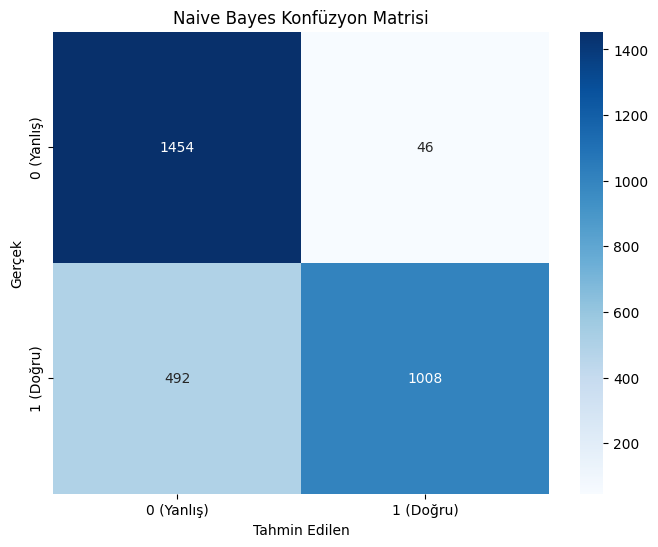


Metrics:
Kesinlik (Precision): 0.96
Duyarlılık (Recall): 0.67
F1 Skoru: 0.79
Doğruluk (Accuracy): 0.82


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Modeli Tanımlama
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Tahmin Yapma
y_pred_nb = nb_model.predict(X_test)

# Performans Metrikleri
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Karışıklık Matrisi
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Yanlış)", "1 (Doğru)"], yticklabels=["0 (Yanlış)", "1 (Doğru)"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Naive Bayes Konfüzyon Matrisi")
plt.show()
kesinlik = precision_score(y_test, y_pred_nb, average='binary')  # İkili sınıflandırma için
duyarlilik = recall_score(y_test, y_pred_nb, average='binary')
f1_skoru = f1_score(y_test, y_pred_nb, average='binary')
dogruluk = accuracy_score(y_test, y_pred_nb)

print("\nMetrics:")
print(f"Kesinlik (Precision): {kesinlik:.2f}")
print(f"Duyarlılık (Recall): {duyarlilik:.2f}")
print(f"F1 Skoru: {f1_skoru:.2f}")
print(f"Doğruluk (Accuracy): {dogruluk:.2f}")

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1500
           1       0.77      0.88      0.82      1500

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.80      3000
weighted avg       0.81      0.81      0.80      3000



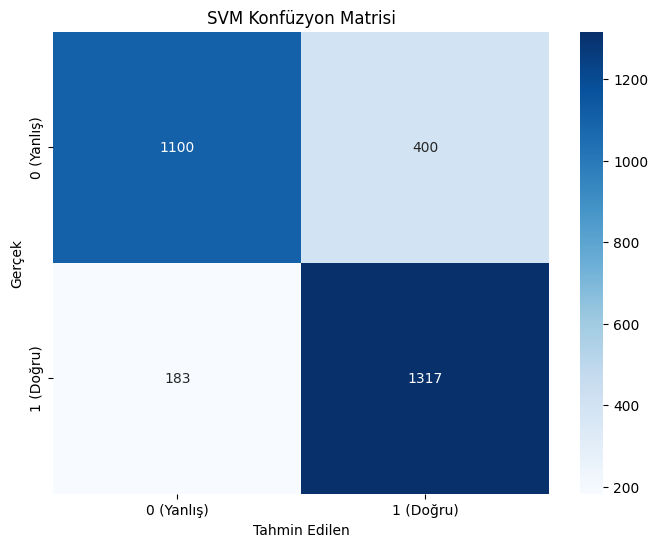


Metrics:
Kesinlik (Precision): 0.77
Duyarlılık (Recall): 0.88
F1 Skoru: 0.82
Doğruluk (Accuracy): 0.81


In [ ]:
from sklearn.svm import LinearSVC

# SVM Modelini Tanımlama
svm_model = LinearSVC(random_state=42, max_iter=5000)
svm_model.fit(X_train, y_train)

# Tahmin Yapma
y_pred_svm = svm_model.predict(X_test)

# Performans Metrikleri
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Karışıklık Matrisi
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Yanlış)", "1 (Doğru)"], yticklabels=["0 (Yanlış)", "1 (Doğru)"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("SVM Konfüzyon Matrisi")
plt.show()

kesinlik = precision_score(y_test, y_pred_svm, average='binary')  # İkili sınıflandırma için
duyarlilik = recall_score(y_test, y_pred_svm, average='binary')
f1_skoru = f1_score(y_test, y_pred_svm, average='binary')
dogruluk = accuracy_score(y_test, y_pred_svm)

print("\nMetrics:")
print(f"Kesinlik (Precision): {kesinlik:.2f}")
print(f"Duyarlılık (Recall): {duyarlilik:.2f}")
print(f"F1 Skoru: {f1_skoru:.2f}")
print(f"Doğruluk (Accuracy): {dogruluk:.2f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1500
           1       0.79      0.71      0.75      1500

    accuracy                           0.76      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000



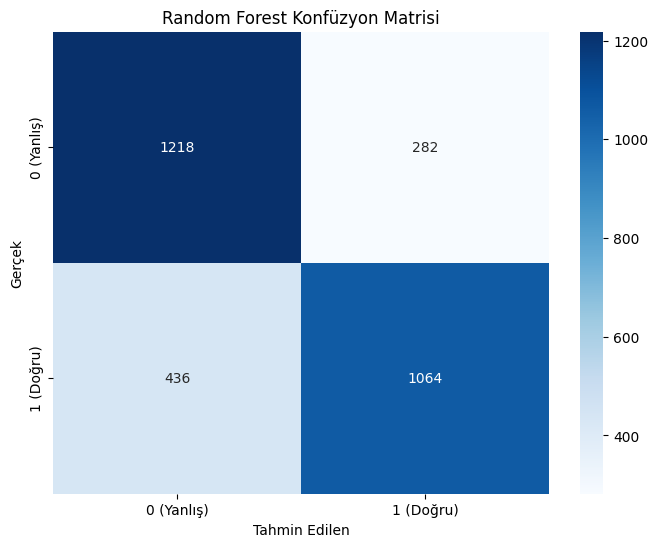


Metrics:
Kesinlik (Precision): 0.79
Duyarlılık (Recall): 0.71
F1 Skoru: 0.75
Doğruluk (Accuracy): 0.76


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin Yapma
y_pred_rf = rf_model.predict(X_test)

# Performans Metrikleri
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Karışıklık Matrisi
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Yanlış)", "1 (Doğru)"], yticklabels=["0 (Yanlış)", "1 (Doğru)"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Random Forest Konfüzyon Matrisi")
plt.show()
kesinlik = precision_score(y_test, y_pred_rf, average='binary')  # İkili sınıflandırma için
duyarlilik = recall_score(y_test, y_pred_rf, average='binary')
f1_skoru = f1_score(y_test, y_pred_rf, average='binary')
dogruluk = accuracy_score(y_test, y_pred_rf)
print("\nMetrics:")
print(f"Kesinlik (Precision): {kesinlik:.2f}")
print(f"Duyarlılık (Recall): {duyarlilik:.2f}")
print(f"F1 Skoru: {f1_skoru:.2f}")
print(f"Doğruluk (Accuracy): {dogruluk:.2f}")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Veri Setini Yükle
csv_file_path = "/content/translated_true.csv"  # CSV dosyanızın yolu
data = pd.read_csv(csv_file_path)
data2 = pd.read_csv("/content/translated_false.csv")
data["label"]=1
data2["label"]=0
merged_data = pd.concat([data2, data], ignore_index=True)
data = merged_data
# Eksik verileri kaldır
# 2. Özellik ve Hedef Sütunlarını Belirle
# Örnek: "text" sütunu metin, "label" sütunu hedef (0 veya 1)
data = data.dropna()
X = data["translated_text"]
 # Metin sütunu
y = data["label"]  # Hedef sütunu

# 3. TF-IDF ile Metni Vektörleştir
vectorizer = TfidfVectorizer(max_features=5000)  # 5000 en sık kullanılan kelimeyi seçer
X_vectorized = vectorizer.fit_transform(X)

# 4. Veri Setini Ayır (Eğitim ve Test)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# 5. Random Forest Modelini Eğit
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# 6. Test Verisi ile Tahmin Yap
y_pred = rf_model.predict(X_train)

# 7. Performansı Değerlendir
print("Model Performansı:")
print(f"Doğruluk: {accuracy_score(y_train, y_pred):.2f}")

print("\nSınıflandırma Raporu:")
print(classification_report(y_train, y_pred))


(2999, 5000)
(1, 5000)
(2999,)
(1,)
Model Performansı:
Doğruluk: 0.40

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.26      0.11      0.16      1500
           1       0.44      0.69      0.53      1499

    accuracy                           0.40      2999
   macro avg       0.35      0.40      0.35      2999
weighted avg       0.35      0.40      0.35      2999



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:42:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59      1500
           1       0.62      0.81      0.70      1500

    accuracy                           0.65      3000
   macro avg       0.67      0.65      0.65      3000
weighted avg       0.67      0.65      0.65      3000



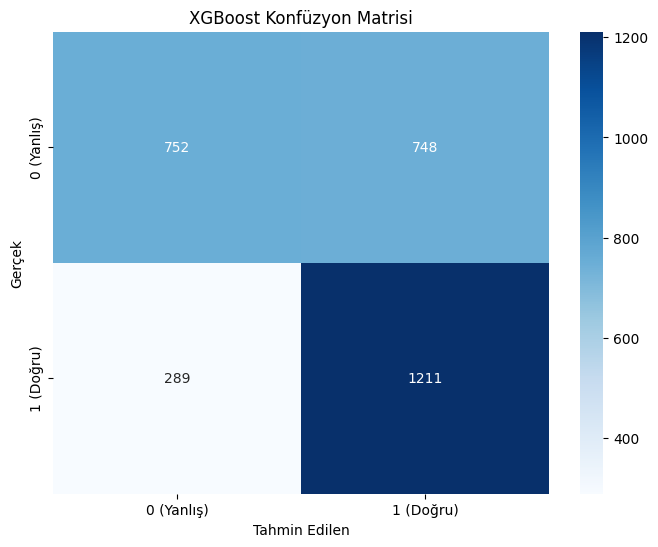


Metrics:
Kesinlik (Precision): 0.62
Duyarlılık (Recall): 0.81
F1 Skoru: 0.70
Doğruluk (Accuracy): 0.65


In [ ]:
import xgboost as xgb

# XGBoost Modeli
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss")
xgb_model.fit(X_train, y_train)

# Tahmin Yapma
y_pred_xgb = xgb_model.predict(X_test)

# Performans Metrikleri
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Karışıklık Matrisi
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (Yanlış)", "1 (Doğru)"], yticklabels=["0 (Yanlış)", "1 (Doğru)"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("XGBoost Konfüzyon Matrisi")
plt.show()
kesinlik = precision_score(y_test, y_pred_xgb, average='binary')  # İkili sınıflandırma için
duyarlilik = recall_score(y_test, y_pred_xgb, average='binary')
f1_skoru = f1_score(y_test, y_pred_xgb, average='binary')
dogruluk = accuracy_score(y_test, y_pred_xgb)
print("\nMetrics:")
print(f"Kesinlik (Precision): {kesinlik:.2f}")
print(f"Duyarlılık (Recall): {duyarlilik:.2f}")
print(f"F1 Skoru: {f1_skoru:.2f}")
print(f"Doğruluk (Accuracy): {dogruluk:.2f}")


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Veriyi ölçeklendirme (deep learning için genellikle önemlidir)
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network Modelini Tanımlama
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # binary classification için sigmoid

# Modeli Derinlemesine Derlemek
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli Eğitme
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Tahmin Yapma
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")

# Performans Metrikleri
from sklearn.metrics import classification_report, confusion_matrix
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Karışıklık Matrisi
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("Neural Network Karışıklık Matrisi:")
print(cm_nn)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Unrecognized data type: x=  (0, 673)	9.330721458409633
  (0, 2054)	26.360761642743135
  (0, 755)	28.18912558557626
  (0, 3282)	17.780677612792466
  (0, 2970)	11.87316045382624
  (0, 4286)	6.611765843831852
  (0, 19)	5.447780633008663
  (0, 809)	26.179017458625232
  (0, 1351)	7.321440846761279
  (0, 4977)	13.610560379104708
  (0, 672)	11.752082855298449
  (0, 4552)	30.59440621015187
  (0, 1784)	21.19311126778891
  (0, 687)	32.327532712025814
  (0, 617)	3.380995266245658
  (0, 2863)	8.440999029515275
  (0, 4046)	37.07769908055578
  (0, 4685)	40.974125260229314
  (0, 1056)	26.047283249971926
  (1, 3720)	2.211813047090679
  (1, 2858)	2.394196552013455
  (1, 1897)	4.192351705128695
  (1, 1194)	6.445931445998347
  (1, 4466)	5.419533318113364
  (1, 1710)	5.03749294697267
  :	:
  (23342, 1687)	8.459689386740319
  (23342, 422)	16.266690741433507
  (23342, 1841)	7.818139920430565
  (23342, 423)	25.804812725250066
  (23342, 2857)	4.125612467346386
  (23342, 2128)	5.8886933761937605
  (23342, 354)	4.950933358055442
  (23342, 3655)	15.595202775994736
  (23342, 4912)	7.010584600897458
  (23342, 20)	5.795851957441515
  (23342, 3982)	4.599215016588516
  (23342, 4909)	6.600851893722464
  (23342, 175)	7.985077878694524
  (23342, 1715)	30.218517638946818
  (23342, 237)	5.137752323592309
  (23342, 1960)	17.382456346486034
  (23342, 3350)	5.946814673653287
  (23342, 4843)	17.132129629530084
  (23342, 2490)	18.776251023666696
  (23342, 4284)	19.972903324682374
  (23342, 1436)	19.363274745323984
  (23342, 2147)	25.54907010905444
  (23342, 4059)	12.31326914543426
  (23342, 2711)	17.011092745292768
  (23342, 361)	19.02185051738768 (of type <class 'scipy.sparse._csr.csr_matrix'>)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, (ht, ct) = self.lstm(x)
        out = self.fc(ht[-1])
        return out
# Veriyi numpy array'e dönüştürün (veya doğrudan tensor'a dönüştürebilirsiniz)
X_train_tensor = torch.tensor(X_train_vectorized.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_vectorized.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
# Modeli başlatma
input_dim = X_train_tensor.shape[1]  # Giriş boyutu (özellik sayısı)
hidden_dim = 128  # LSTM gizli katman boyutu
output_dim = 2  # İkili sınıflandırma
model = LSTMModel(input_dim, hidden_dim, output_dim).to(device)

# Loss fonksiyonu ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Eğitim döngüsü
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    model.train()  # Modeli eğitim moduna al
    running_loss = 0.0
    correct = 0
    total = 0

    for data in train_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Gradient sıfırlama
        outputs = model(inputs)  # Modelden tahmin
        loss = criterion(outputs, labels)  # Kaybı hesapla
        loss.backward()  # Geribildirim hesapla
        optimizer.step()  # Parametreleri güncelle

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")
# Test işlemi
model.eval()  # Modeli test moduna al
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


NameError: name 'X_train_vectorized' is not defined

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
584/584 ━━━━━━━━━━━━━━━━━━━━ 105s 176ms/step - accuracy: 0.6455 - loss: 0.6562 - val_accuracy: 0.6470 - val_loss: 0.6513
Epoch 2/5
584/584 ━━━━━━━━━━━━━━━━━━━━ 139s 171ms/step - accuracy: 0.6466 - loss: 0.6517 - val_accuracy: 0.6470 - val_loss: 0.6504
Epoch 3/5
584/584 ━━━━━━━━━━━━━━━━━━━━ 142s 171ms/step - accuracy: 0.6466 - loss: 0.6509 - val_accuracy: 0.6470 - val_loss: 0.6500
Epoch 4/5
584/584 ━━━━━━━━━━━━━━━━━━━━ 142s 172ms/step - accuracy: 0.6466 - loss: 0.6508 - val_accuracy: 0.6470 - val_loss: 0.6501
Epoch 5/5
584/584 ━━━━━━━━━━━━━━━━━━━━ 100s 171ms/step - accuracy: 0.6466 - loss: 0.6506 - val_accuracy: 0.6470 - val_loss: 0.6510
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1500
           1       0.00      0.00      0.00      1500

    accuracy                           0.50      3000
   macro avg       0.25      0.50      0.33      3000
weighted av

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


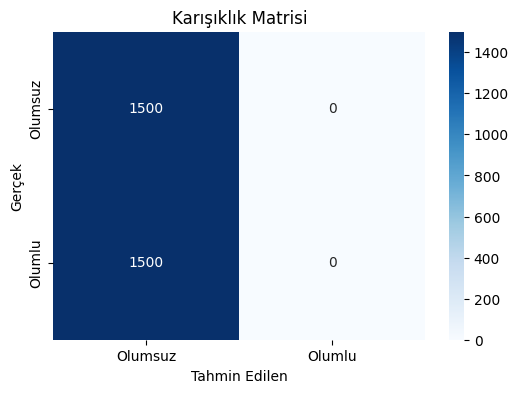

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Örnek veri (kendi veri kümenizi kullanabilirsiniz)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(balanced_train_data["text"])

# Metinleri sequence'e çevirme
X_train_seq = tokenizer.texts_to_sequences(balanced_train_data["text"])
X_test_seq = tokenizer.texts_to_sequences(test_data["text"])

# Padding (Sabit uzunluk sağlamak için)
max_length = 2000  # Maksimum sekans uzunluğu
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding="post")
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(balanced_train_data["label"])
y_test = label_encoder.transform(test_data["label"])

# 4. Model oluşturma
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),  # Kelime vektörleri
    LSTM(128, return_sequences=False),  # LSTM katmanı
    Dropout(0.3),  # Aşırı öğrenmeyi önlemek için Dropout
    Dense(64, activation="relu"),  # Ara katman
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # Çıkış katmanı (binary classification)
])

# 5. Modeli derleme
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 6. Modeli eğitme
model.fit(X_train, np.array(y_train), epochs=5, batch_size=32, validation_split=0.2)

# 7. Test veri setinde tahmin yapma
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# 8. Performans metrikleri
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# 9. Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Olumsuz", "Olumlu"], yticklabels=["Olumsuz", "Olumlu"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi")
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer tanımlama
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(balanced_train_data["text"])

# Metinleri sequence'e çevirme
X_train_seq = tokenizer.texts_to_sequences(balanced_train_data["text"])
X_test_seq = tokenizer.texts_to_sequences(test_data["text"])

# Padding (Sabit uzunluk sağlamak için)
max_length = 200  # Maksimum sekans uzunluğu
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding="post")


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Etiketleri encode etme
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(balanced_train_data["label"])
y_test = label_encoder.transform(test_data["label"])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy

loss_fn = BinaryCrossentropy(from_logits=False, label_smoothing=0, reduction="sum", name="binary_crossentropy")

# Model oluşturma
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),  # Embedding katmanı
    LSTM(128, return_sequences=False),  # LSTM katmanı
    Dropout(0.3),  # Overfitting'i önlemek için Dropout
    Dense(64, activation="relu"),  # Dense katmanı
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # Çıkış katmanı (binary classification için)
])

# Modeli derleme
model.compile(loss=loss_fn, optimizer="adam", metrics=["accuracy"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.7353 - loss: 18.2642 - val_accuracy: 0.5847 - val_loss: 28.6567
Epoch 2/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8120 - loss: 14.3741 - val_accuracy: 0.6977 - val_loss: 19.6219
Epoch 3/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9463 - loss: 5.9459 - val_accuracy: 0.7530 - val_loss: 17.0063
Epoch 4/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9537 - loss: 5.2011 - val_accuracy: 0.6740 - val_loss: 41.4952
Epoch 5/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9715 - loss: 3.3823 - val_accuracy: 0.6690 - val_loss: 50.1553
Epoch 6/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9796 - loss: 2.3933 - val_accuracy: 0.6067 - val_loss: 76.5078
Epoch 7/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9850 - loss: 1.6591 - val_accuracy: 0.5927 - val_loss: 113.6342
Epoch 8/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9909 - loss: 

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3074 - loss: 189.9544
Test Loss: 115.77445983886719
Test Accuracy: 0.5603333115577698


In [ ]:
# Tahmin yap
y_pred_prob = model.predict(X_test)
print(y_pred_prob)  # Olasılık tahminleri (0-1 arasında)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Sınıf tahminleri (0 veya 1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step
[[0.12190788]
 [0.12190788]
 [0.12190788]
 ...
 [0.12190779]
 [0.12190779]
 [0.12190779]]


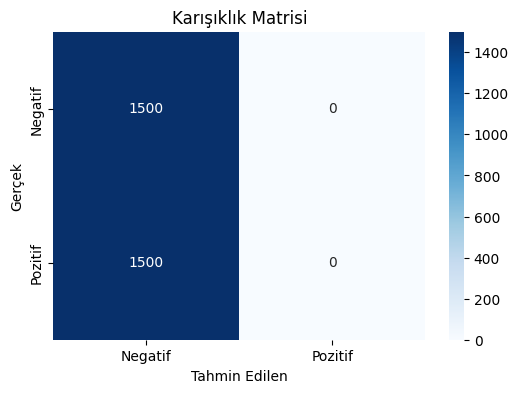

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karışıklık matrisi hesapla
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi")
plt.show()


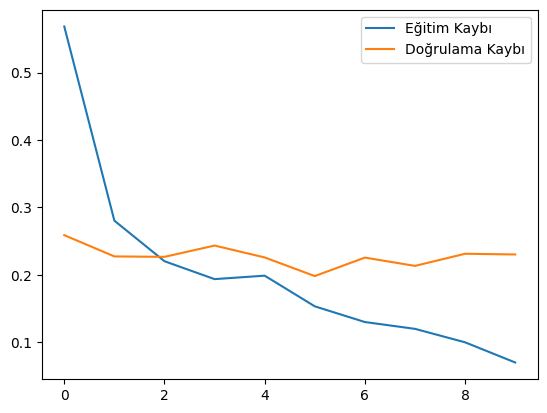

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybını çizme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(balanced_train_data["text"])

# Text to sequences
X_train_seq = tokenizer.texts_to_sequences(balanced_train_data["text"])
X_test_seq = tokenizer.texts_to_sequences(test_data["text"])

# Padding
max_length = 200
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding="post")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7858 - loss: 0.4766 - val_accuracy: 0.7590 - val_loss: 0.5416
Epoch 2/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9432 - loss: 0.1820 - val_accuracy: 0.7247 - val_loss: 0.6571
Epoch 3/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9564 - loss: 0.1448 - val_accuracy: 0.7590 - val_loss: 0.7060
Epoch 4/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9690 - loss: 0.1100 - val_accuracy: 0.6710 - val_loss: 0.9312
Epoch 5/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9765 - loss: 0.0869 - val_accuracy: 0.6470 - val_loss: 1.5879
Epoch 6/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9831 - loss: 0.0611 - val_accuracy: 0.6890 - val_loss: 1.7464
Epoch 7/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9887 - loss: 0.0452 - val_accuracy: 0.6413 - val_loss: 1.7830
Epoch 8/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9915 - loss: 0.0319 - val

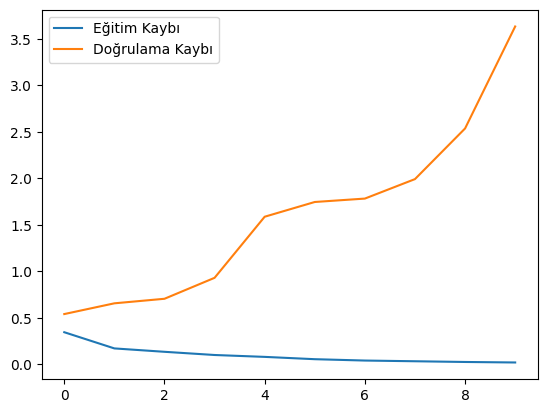

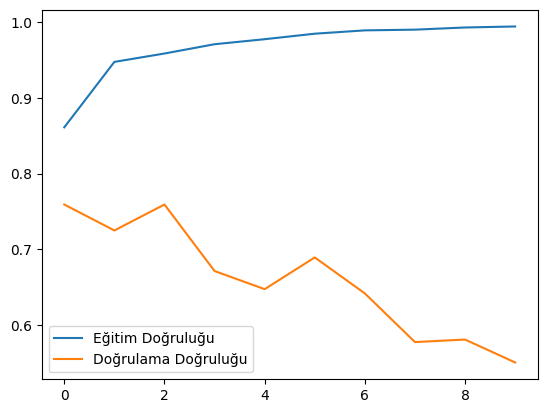

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(balanced_train_data["label"])
y_test = label_encoder.transform(test_data["label"])
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, LSTM, Dense, Dropout

from tensorflow.keras.layers import ConvLSTM2D

from tensorflow.keras.layers import TimeDistributed, Reshape

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    Conv1D(128, 5, activation="relu"),
    Reshape((-1, 128)),  # Zaman boyutunu geri kazandır
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])


# Modeli Derleme
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Model Özeti
model.summary()
history = model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_padded, y_test)
)
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.show()


In [ ]:
# 1. Test veri kümesinde tahmin yap
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# 2. Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi")
plt.show()

# 3. Metrikleri hesapla
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Doğruluk (Accuracy): {accuracy:.2f}")
print(f"Kesinlik (Precision): {precision:.2f}")
print(f"Duyarlılık (Recall): {recall:.2f}")
print(f"F1 Skoru: {f1:.2f}")


ValueError: Exception encountered when calling Reshape.call().

[1mCannot reshape a tensor with 20463616 elements to shape [32,196,128] (802816 elements) for '{{node sequential_2_1/reshape_1/Reshape}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32](sequential_2_1/conv1d_1/Relu, sequential_2_1/reshape_1/Reshape/shape)' with input shapes: [32,4996,128], [3] and with input tensors computed as partial shapes: input[1] = [32,196,128].[0m

Arguments received by Reshape.call():
  • inputs=tf.Tensor(shape=(32, 4996, 128), dtype=float32)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "dbmdz/bert-base-turkish-cased"  # Türkçe için uygun modeli seçin
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from datasets import Dataset

# Eğitim ve test veri çerçevelerini Hugging Face Dataset'e dönüştür
train_dataset = balanced_train_data
test_dataset = test_data

# Kontrol
print(train_dataset)
print(test_dataset)


Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 3000
})
Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 23343
})


In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_train = balanced_train_data.map(tokenize_function, batched=True)
tokenized_test = test_data.map(tokenize_function, batched=True)

tokenized_train = tokenized_train.remove_columns(["text"])
tokenized_test = tokenized_test.remove_columns(["text"])

tokenized_train.set_format("torch")
tokenized_test.set_format("torch")


Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/23343 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    report_to="none",
    fp16=True  # GPU kullanıyorsanız eğitim için Mixed Precision aktif hale getirir (daha hızlı eğitim)

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
)

trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-9-16b30500beff>:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

predictions = trainer.predict(tokenized_test)
preds = predictions.predictions.argmax(-1)
labels = tokenized_test["label"]

accuracy = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


ValueError: Input arrays use different devices: cpu, cpu

Epoch,Training Loss,Validation Loss


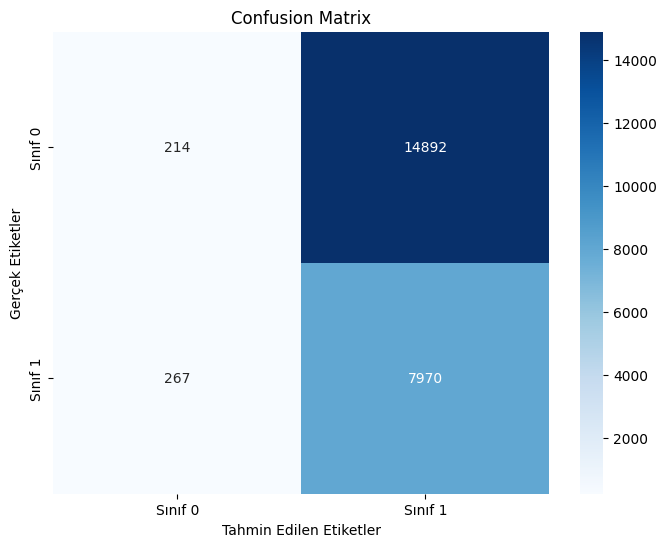

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Test setindeki tahminler
predictions = trainer.predict(tokenized_test)
preds = predictions.predictions.argmax(-1)  # Modelin tahmin ettiği sınıflar
labels = tokenized_test["label"]  # Gerçek etiketler

# Confusion Matrix hesaplama
cm = confusion_matrix(labels, preds)

# Confusion Matrix'i Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sınıf 0", "Sınıf 1"], yticklabels=["Sınıf 0", "Sınıf 1"])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')
plt.show()


Karışıklık matrisinin her bir değerini sırayla giriniz.
Sıra: TP (True Positive), FP (False Positive), FN (False Negative), TN (True Negative)
TP (True Positive): 1221
FP (False Positive): 254
FN (False Negative): 153
TN (True Negative): 1372
\BERT TÜRKÇE KONFÜZYON Matrisi:
[[1221  254]
 [ 153 1372]]


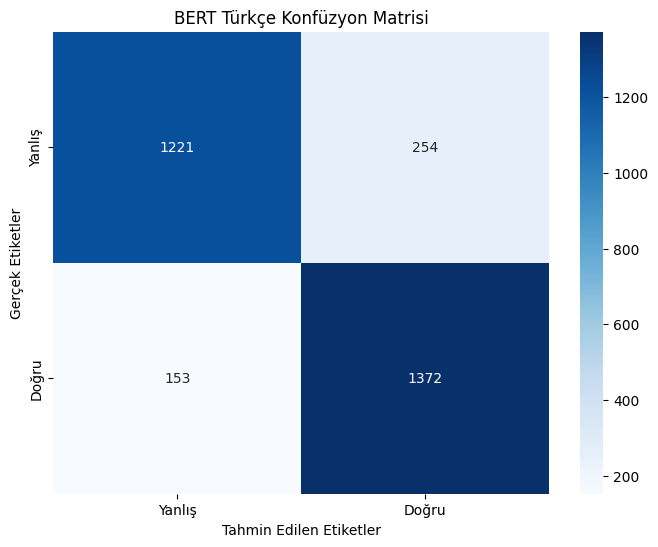


Performans Metrikleri:
Doğruluk (Accuracy): 0.86
Kesinlik (Precision): 0.83
Hatırlama (Recall): 0.89
F1 Skoru: 0.86


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

# Kullanıcıdan karışıklık matrisi girdilerini al
def get_confusion_matrix():
    print("Karışıklık matrisinin her bir değerini sırayla giriniz.")
    print("Sıra: TP (True Positive), FP (False Positive), FN (False Negative), TN (True Negative)")

    # Hücreleri al
    tp = int(input("TP (True Positive): "))
    fp = int(input("FP (False Positive): "))
    fn = int(input("FN (False Negative): "))
    tn = int(input("TN (True Negative): "))

    # Matrisi oluştur
    cm = np.array([[tp, fp],
                   [fn, tn]])
    return cm

# Performans metriklerini hesapla
def calculate_metrics(cm):
    tp, fp, fn, tn = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]

    # Gerçek ve tahmin etiketlerini çıkar
    y_true = [1] * tp + [0] * tn + [1] * fn + [0] * fp
    y_pred = [1] * tp + [1] * fp + [0] * fn + [0] * tn

    # Metrikleri hesapla
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1

# Karışıklık matrisini görselleştir
def plot_confusion_matrix(cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    print("\BERT TÜRKÇE KONFÜZYON Matrisi:")
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Yanlış", "Doğru"], yticklabels=["Yanlış", "Doğru"])
    plt.xlabel('Tahmin Edilen Etiketler')
    plt.ylabel('Gerçek Etiketler')
    plt.title('BERT Türkçe Konfüzyon Matrisi')

    plt.show()

# Ana akış
if __name__ == "__main__":
    try:
        # Karışıklık matrisini al
        cm = get_confusion_matrix()

        # Matrisi görselleştir
        plot_confusion_matrix(cm)

        # Performans metriklerini hesapla
        accuracy, precision, recall, f1 = calculate_metrics(cm)

        # Metrikleri yazdır
        print("\nPerformans Metrikleri:")
        print(f"Doğruluk (Accuracy): {accuracy:.2f}")
        print(f"Kesinlik (Precision): {precision:.2f}")
        print(f"Hatırlama (Recall): {recall:.2f}")
        print(f"F1 Skoru: {f1:.2f}")

    except Exception as e:
        print(f"Hata: {e}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Doğruluk (Accuracy)
labels = test_dataset["label"]
# preds = preds.to("cuda")
accuracy = accuracy_score(labels, preds)
print(f"Accuracy: {accuracy:.2f}")

# Kesinlik (Precision)
precision = precision_score(labels, preds)
print(f"Precision: {precision:.2f}")

# Hatırlama (Recall)
recall = recall_score(labels, preds)
print(f"Recall: {recall:.2f}")

# F1 Skoru
f1 = f1_score(labels, preds)
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.96
Precision: 1.00
Recall: 0.91
F1 Score: 0.95


In [ ]:
import torch

# Cihazı kontrol et (GPU varsa GPU, yoksa CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modeli cihaza taşı
model = model.to(device)

# Kullanıcıdan input al
input_text = """Kasım ayının son haftasında Bankacılık Düzenleme ve Denetleme Kurumu (BDDK), bankalara yönelik sermaye yeterlilik hesaplamalarında bireysel ve konut kredilerine uygulanan ilave risk ağırlığını kaldırdı. """

# Tokenizer ile metni tokenle
inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=128)

# Veriyi cihaza taşı
inputs = {key: value.to(device) for key, value in inputs.items()}

# Tokenize edilmiş veriyi kontrol et
print(inputs)

# Modeli değerlendirme modunda kullanma
model.eval()

# Input'u modele verme ve tahmin yapma
with torch.no_grad():
    outputs = model(**inputs)

# Modelin tahmin ettiği sınıf
predicted_class = outputs.logits.argmax(dim=-1).item()

# Sonuçları yazdır
print(f"Modelin tahmin ettiği sınıf: {predicted_class}")


{'input_ids': tensor([[    2,  4101, 12283,  2094, 13163, 17325, 18285,  1992, 21173,  7434,
            12, 22208,    13,    16, 26681,  3589,  8224, 20942, 16306,  2472,
          8390,  1992,  5932, 28447,  2696,  8420,  7334,  4875, 31282, 24138,
            18,     3]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
Modelin tahmin ettiği sınıf: 0


In [ ]:
#Ortak set üzerinde test (translated)

import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. CSV Dosyasını Yükleyin
csv_file_path = "/content/translated_true.csv"  # CSV dosyanızın yolu
data = pd.read_csv(csv_file_path)
data2 = pd.read_csv("/content/translated_false.csv")
data["label"]=1
data2["label"]=0
merged_data = pd.concat([data2], ignore_index=True)
data = merged_data
# Eksik verileri kaldır
# 2. Özellik ve Hedef Sütunlarını Belirle
# Örnek: "text" sütunu metin, "label" sütunu hedef (0 veya 1)
test_data = data.dropna()
# Hedef sütunu

# 2. BERT Tokenizer ve Modeli Yükleyin


# 3. Test Verisini Hazırlayın
# Test veri setindeki metin sütununu seçin
texts = test_data["translated_text"].tolist()  # "text" sütunu metin verisini içermeli
true_labels = test_data["label"].tolist()  # Gerçek etiketler (hedef)

# Tokenize Etme (BERT'e uygun hale getirme)
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)
inputs = {key: value.to("cuda") for key, value in inputs.items()}

# 4. Modeli Test Etme (Tahmin Yapma)
model.eval()  # Modeli test moduna al
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits  # Logitleri al (modelin çıkışı)

# 5. Tahmin Sonuçlarını Al
predictions = torch.argmax(logits, dim=-1).tolist()  # En yüksek logite sahip sınıfı seç

# 6. Confusion Matrix Hesapla
cm = confusion_matrix(true_labels, predictions)

# 7. Confusion Matrix'i Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.config.id2label.values())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.20 GiB. GPU 0 has a total capacity of 14.75 GiB of which 2.17 GiB is free. Process 9500 has 12.57 GiB memory in use. Of the allocated memory 12.30 GiB is allocated by PyTorch, and 144.57 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)